# **Taller 8: Regresión Avanzada.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiantes: Daniela Olarte y Alexander Sanchez.**

En este taller vamos a comparar los resultados de varios métodos usados para regresión: regresión lineal múltiple, regresión Ridge, regresión Lasso, árboles de decisión y regresión XGBoost.

# 0. Librerías.

In [1]:
#Librerías de interés.
import os
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 

#from google.colab import files       #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.

from copy import deepcopy                            #Permite hacer copias profundas. 

#!pip install yellowbrick --upgrade                   #Instala y actualiza la librería yellowbrick (la versión por defecto en Google Colab está desactualizada).

from numpy.random import default_rng                 #Generador de números pseudo aleatorios.

%matplotlib inline

# 1. Cargar Datos.

Concrete Strength

Concrete is the most important material in civil engineering.
The concrete compressive strength is a highly nonlinear function of age and ingredients.

https://www.kaggle.com/datasets/maajdl/yeh-concret-data

In [2]:
df = pd.read_csv('Concrete_Data_Yeh.csv')

# 2. Análisis Exploratorio de los Datos (EDA)

In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


### 2.2 Limpieza

In [8]:
df_clean = deepcopy(df)

### 2.3 Correlación

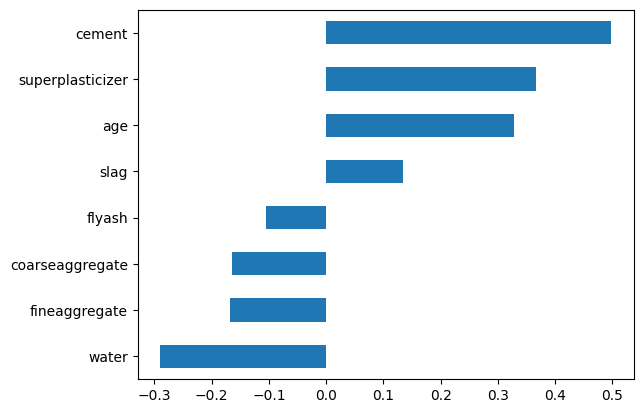

In [9]:
df_clean.corr()['csMPa'].sort_values().head(11)[:-1].plot.barh();

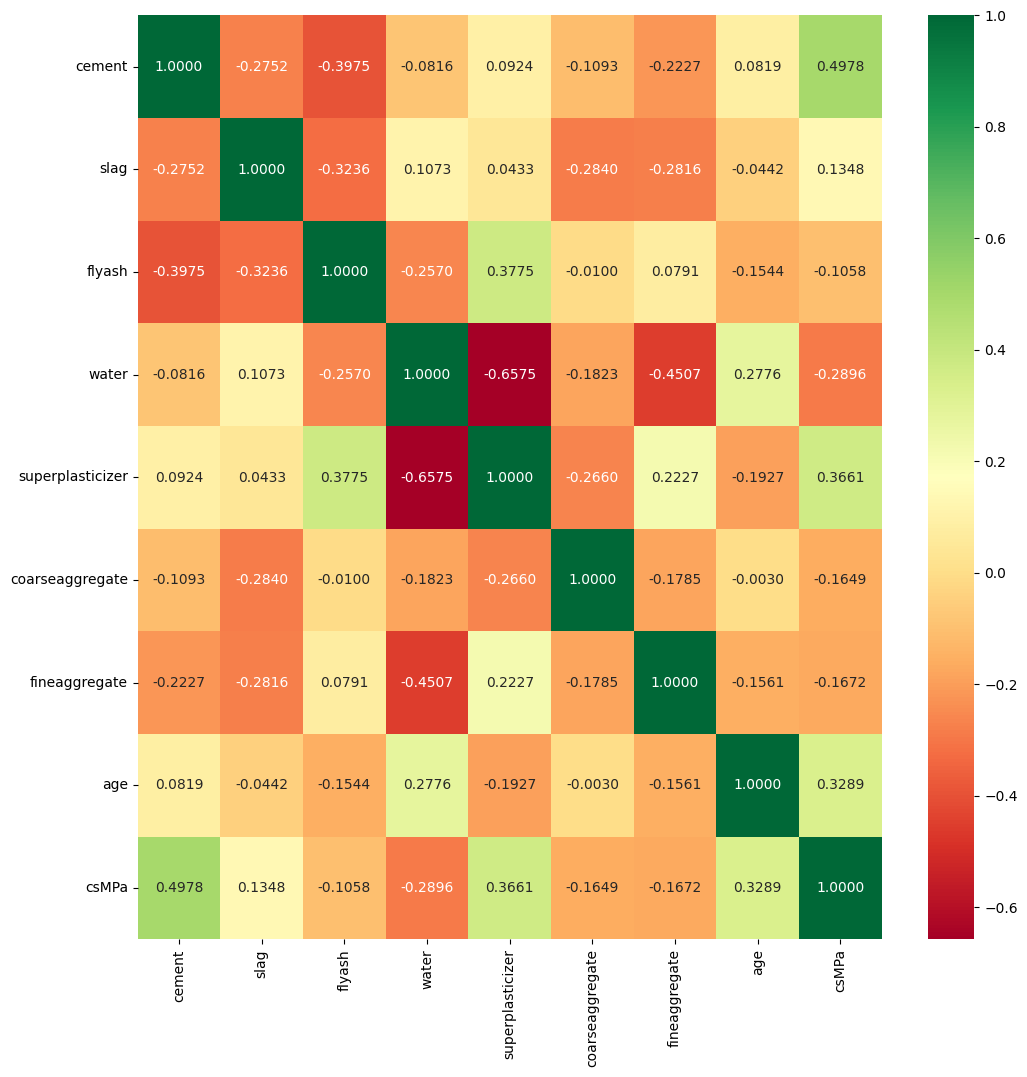

In [10]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn',fmt='0.4f')

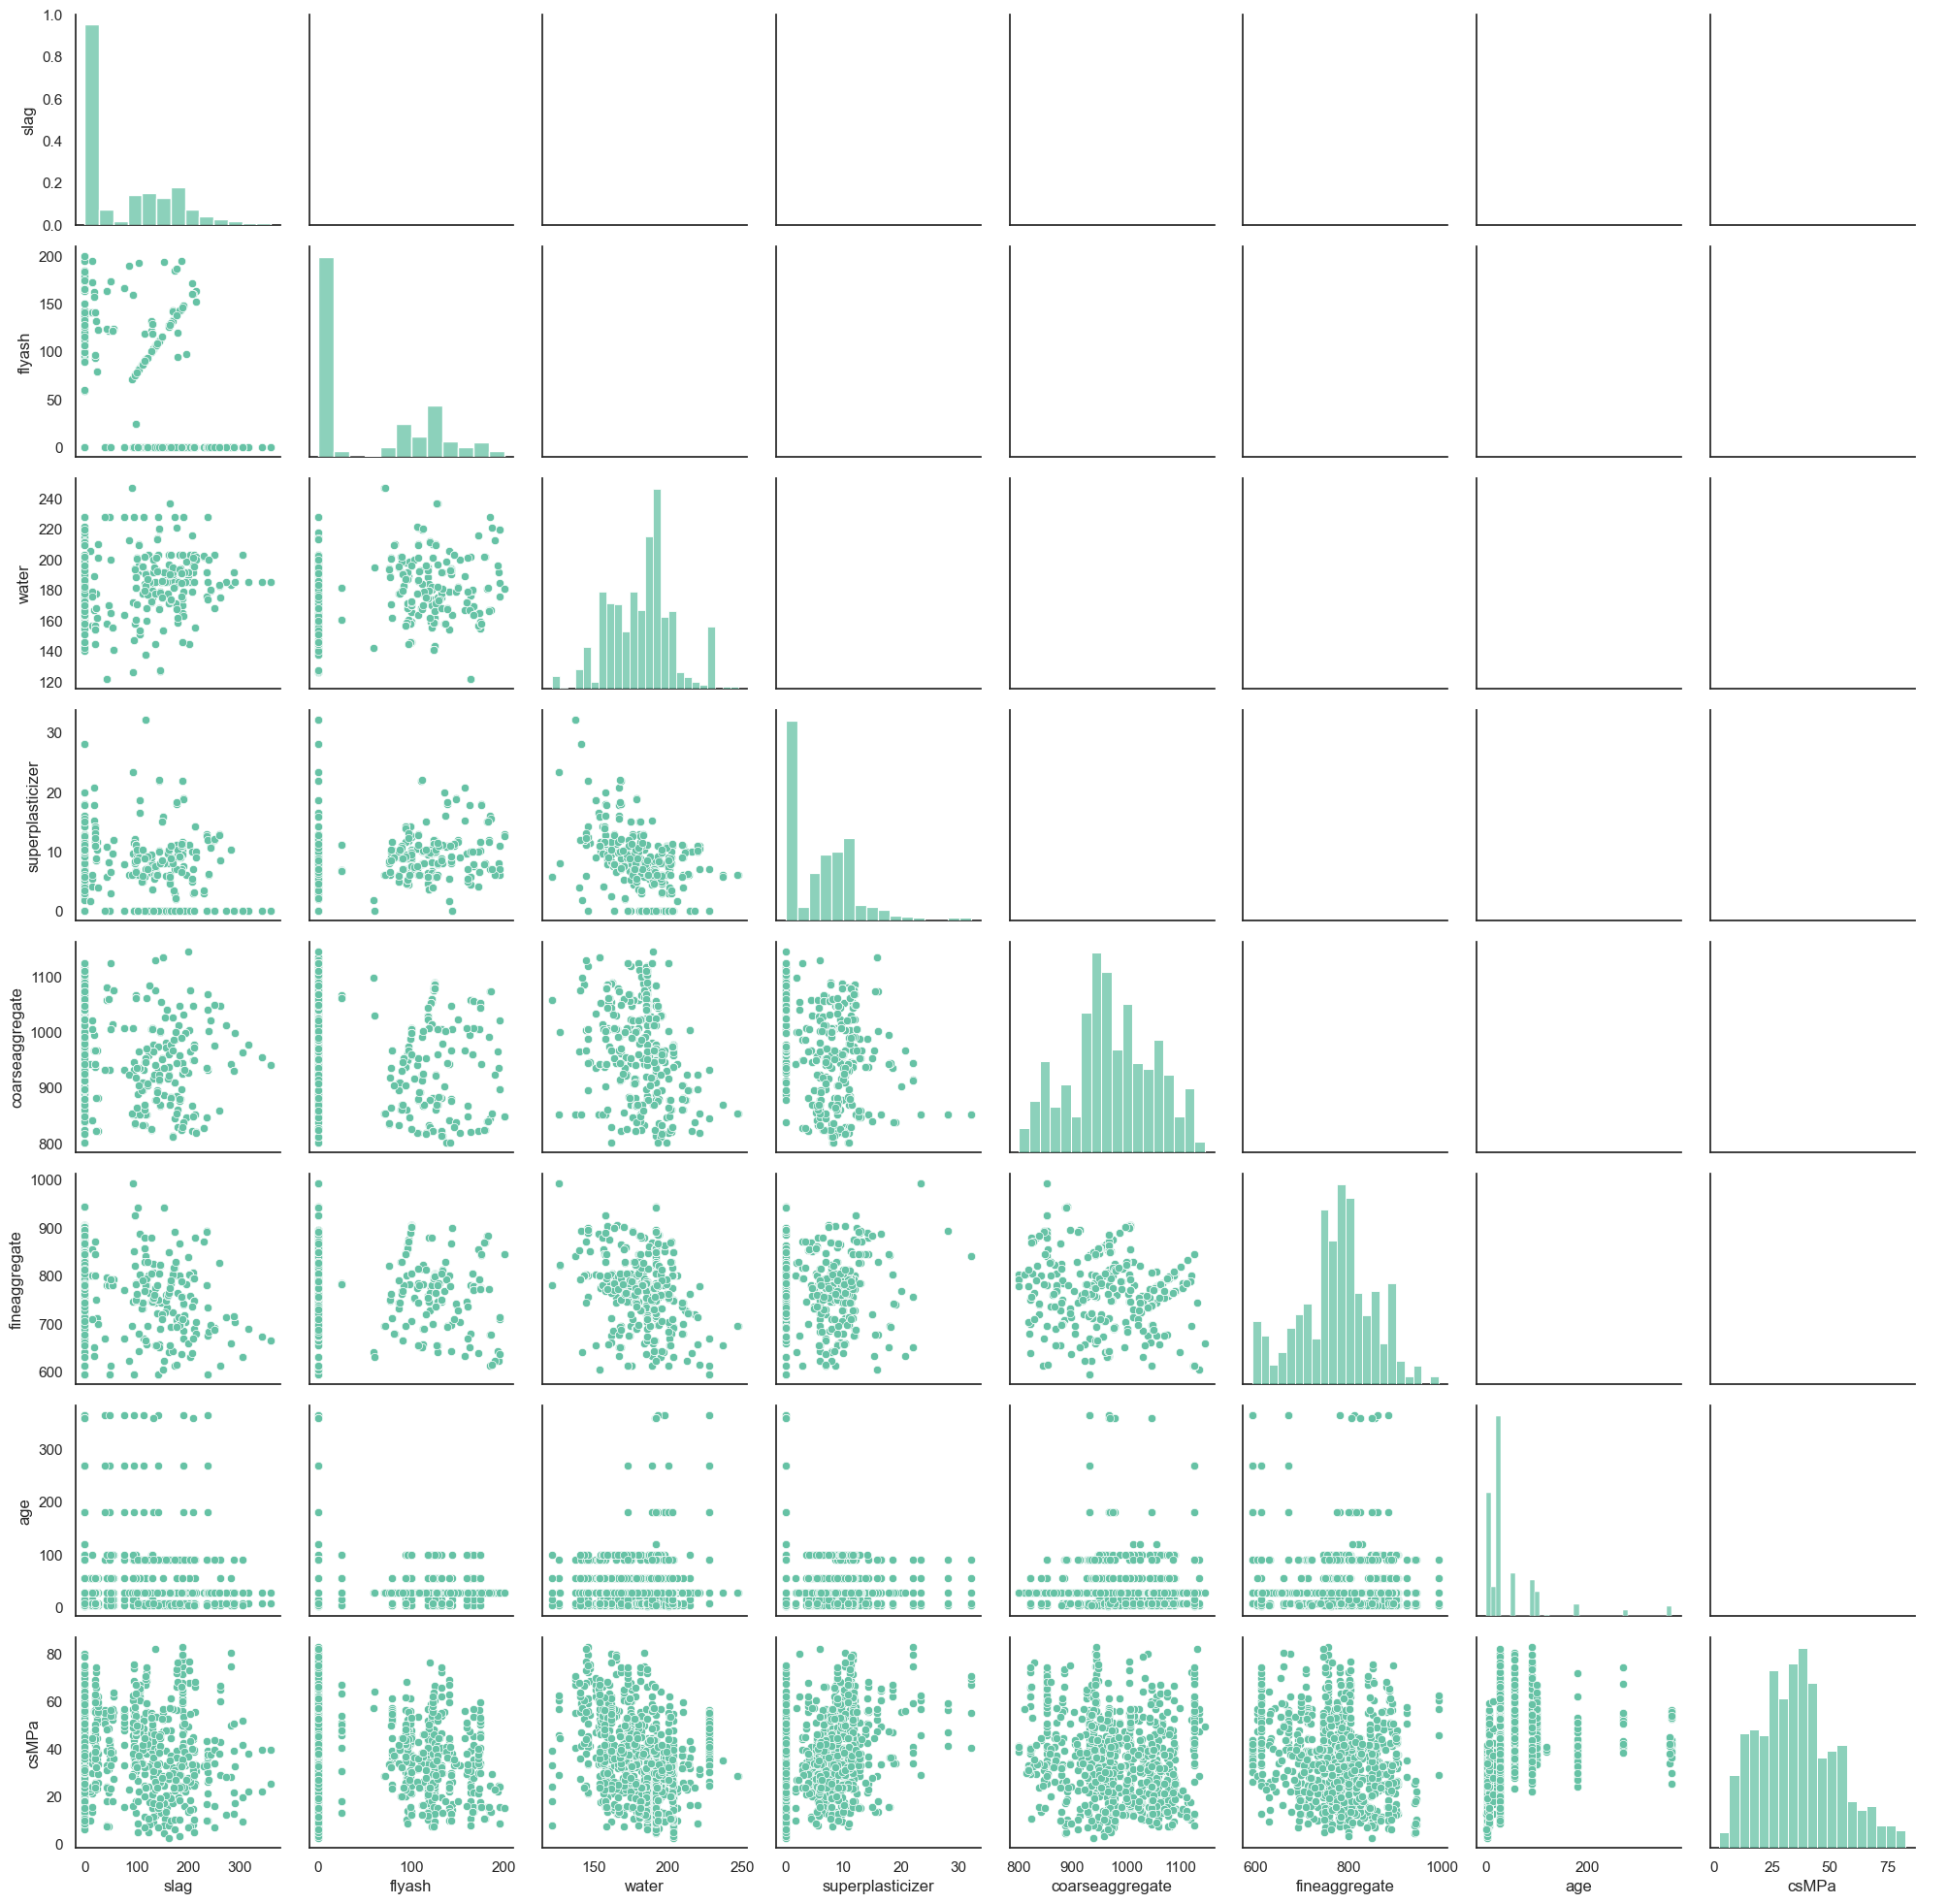

In [11]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean.iloc[:,1:],diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

# 3. Modelo

## 3.1 Regresión lineal múltiple

#### a. Se crea el modelo con los hiperparámetros por defecto.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()

#### b. Se seleccionan los atributos para entrenar el modelo.

In [13]:
# 0   cement            1030 non-null   float64
# 1   slag              1030 non-null   float64
# 2   flyash            1030 non-null   float64
# 3   water             1030 non-null   float64
# 4   superplasticizer  1030 non-null   float64
# 5   coarseaggregate   1030 non-null   float64
# 6   fineaggregate     1030 non-null   float64
# 7   age               1030 non-null   int64  
# Target: 8   csMPa             1030 non-null   float64

In [14]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='csMPa'

y = df_clean[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(y.shape)

#nombre_de_las_variables_de_entrada = []
#df_x = df_clean[nombre_de_las_variables_de_entrada]

X = df_clean.drop([nombre_de_la_variable_de_salida],axis=1)

print('\nDataframe de entrada:')
print(type(X))
print(X.shape)

Dataframe de salida:
(1030,)

Dataframe de entrada:
<class 'pandas.core.frame.DataFrame'>
(1030, 8)


#### c. Se dividen los datos en conjuntos de entrenamiento, validación y prueba.

In [15]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_validacion    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_validacion = particion_para_entrenamiento+particion_para_validacion #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_validacion #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
X_rest, X_test, y_rest, y_test = train_test_split(X,                                         #100% de los datos de entrada. 
                                                  y,                                         #100% de los datos de salida. 
                                                  test_size=particion_para_pruebas, 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
X_train, X_val, y_train, y_val = train_test_split(X_rest,                                    #Una fracción de los datos de entrada. 
                                                  y_rest,                                    #Una fracción de los datos de salida.        
                                                  test_size=particion_para_validacion/particion_para_entrenamiento_y_validacion, #cuidado! este es el porcentaje respecto al "resto". 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('Conjunto de datos de entrenamiento {:1.0f}% = {} ejemplos.'.format(particion_para_entrenamiento*100,X_train.shape[0]))
print('Conjunto de datos de validación    {:1.0f}% = {} ejemplos.'.format(particion_para_validacion*100,X_val.shape[0]))
print('Conjunto de datos de prueba        {:1.0f}% = {} ejemplos.'.format(particion_para_pruebas*100,X_test.shape[0]))

Conjunto de datos de entrenamiento 60% = 618 ejemplos.
Conjunto de datos de validación    20% = 206 ejemplos.
Conjunto de datos de prueba        20% = 206 ejemplos.


#### d. Se escalan los atributos (opcional).

#### e. Se entrena el modelo.

In [16]:
lin_reg_1.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression (X,y,y_pred):
    
    score = r2_score(y, y_pred)
    print('R^2: %.4f' % score)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print('MSE: %.4f'% mse)
    print('RMSE: %.4f' % rmse)

    e = y - y_pred

    plt.scatter(y_pred,e)
    a = np.zeros(len(e))
    a = a.reshape(-1,1)
    plt.scatter(y_pred,a)
    plt.title('Residuals vs Predicted values')
    plt.ylabel('Residuals')
    plt.xlabel('Predicted')
    plt.show()

#### f. Se prueba el modelo usando los conjuntos de entrenamiento y validación.

Training
R^2: 0.6240
MSE: 112.8501
RMSE: 10.6231


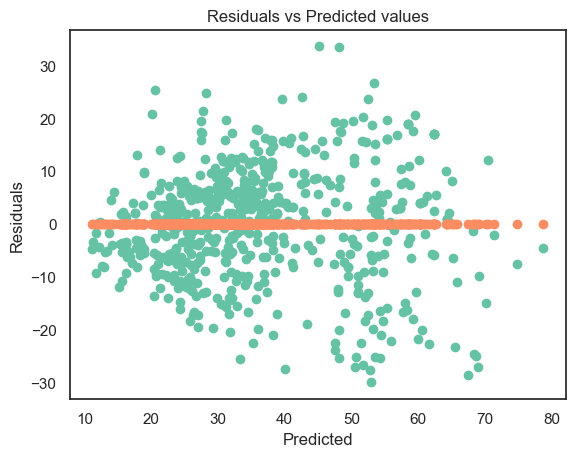

In [18]:
y_pred_train = lin_reg_1.predict(X_train)
print('Training')
eval_regression(X_train,y_train,y_pred_train)

Validation
R^2: 0.5483
MSE: 106.5755
RMSE: 10.3235


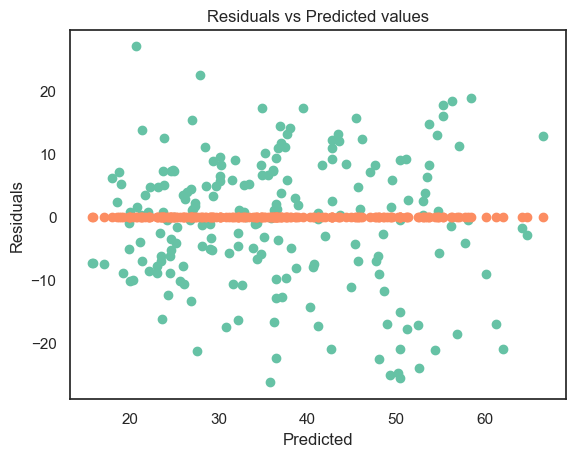

In [19]:
y_pred_val = lin_reg_1.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

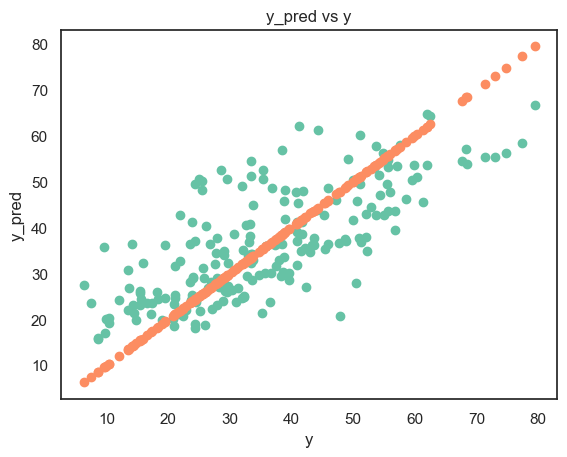

In [20]:
plt.scatter(y_val, y_pred_val)
plt.scatter(y_val, y_val)
plt.title('y_pred vs y')
plt.ylabel('y_pred')
plt.xlabel('y')
plt.show()

#### g. Validación cruzada (cross-validation) del modelo.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lin_reg_2 = LinearRegression()

scores = cross_validate(lin_reg_2, X_rest, y_rest, cv=10, scoring=('neg_mean_squared_error','r2'))

mse_scores = abs(scores['test_neg_mean_squared_error'])
mse = mse_scores.mean()
rmse = np.sqrt(mse)
std_mse = mse_scores.std()
a = np.sqrt(mse_scores)
std_rmse = a.std()

r2_scores = abs(scores['test_r2'])
r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print('R^2: %.4f'% r2)
print('Std MAE: %.4f'% std_r2)
print('RMSE: %.4f'% rmse)
print('Std RMSE: %.4f'% std_rmse)

R^2: 0.5894
Std MAE: 0.0754
RMSE: 10.7023
Std RMSE: 1.0420


## 3.2 Regresión Ridge

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

GridSearchCv for beginners
https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_val=scale.transform(X_val)
X_test=scale.transform(X_test)

In [24]:
ridge = Ridge()

alphas = np.arange(0.1, 100, 0.1)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(X_train, y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

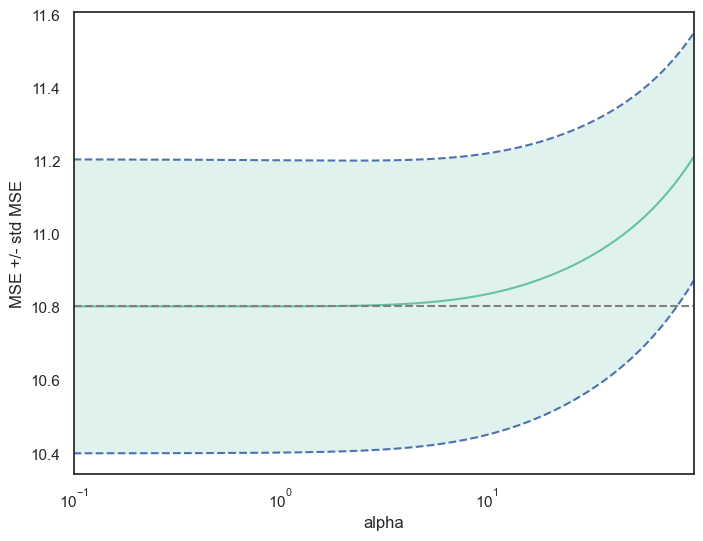

In [25]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("MSE +/- std MSE")
plt.xlabel("alpha")
plt.axhline(np.min(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [26]:
clf.best_params_

{'alpha': 0.7000000000000001}

In [27]:
alpha = 0.7
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

Validation
R^2: 0.5494
MSE: 106.3098
RMSE: 10.3107


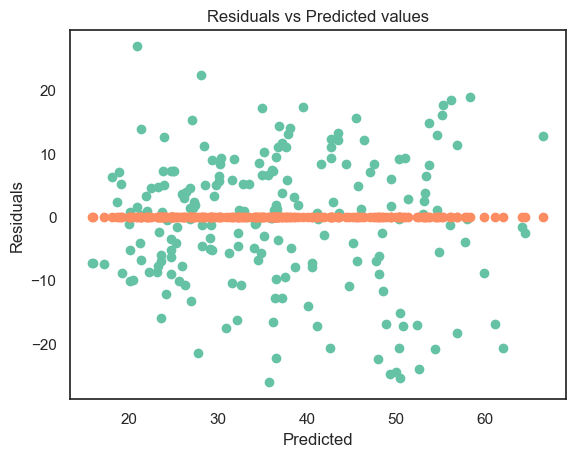

In [28]:
y_pred_val = ridge_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## 3.3 Regresión Lasso

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()

alphas = np.arange(0.001, 10, 0.001)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(X_train, y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

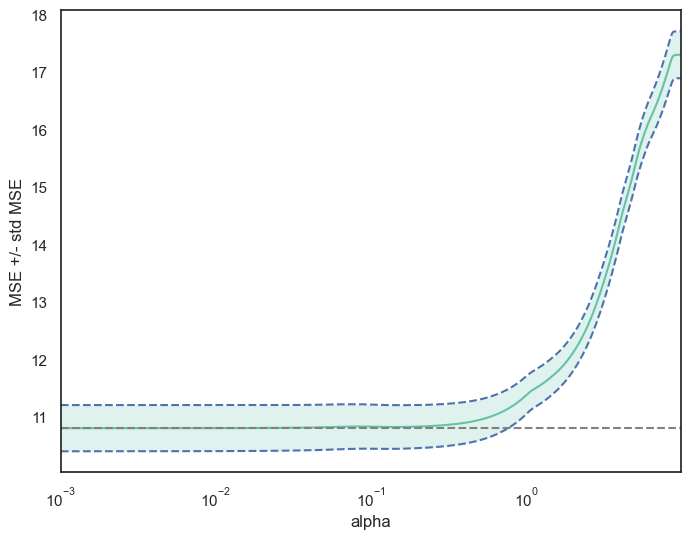

In [30]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("MSE +/- std MSE")
plt.xlabel("alpha")
plt.axhline(np.min(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [31]:
clf.best_params_

{'alpha': 0.001}

In [32]:
alpha = 0.1
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [33]:
print('intercept [w0]=', lasso_model.intercept_)
print('slope [wn]=', lasso_model.coef_)

intercept [w0]= 35.94930420711974
slope [wn]= [ 1.13053314e+01  7.93986859e+00  4.20625330e+00 -4.51503057e+00
  1.15697956e+00  0.00000000e+00  6.01962410e-03  6.51790722e+00]


Validation
R^2: 0.5545
MSE: 105.1122
RMSE: 10.2524


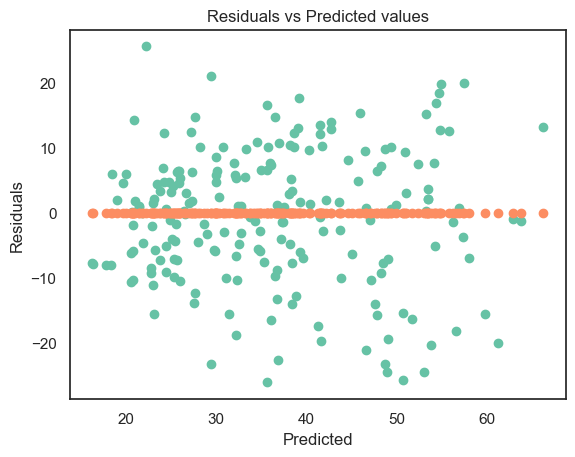

In [34]:
y_pred_val = lasso_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

In [35]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
print(feature_coef)

           features       coef
0            cement  11.305331
1              slag   7.939869
2            flyash   4.206253
3             water  -4.515031
4  superplasticizer   1.156980
5   coarseaggregate   0.000000
6     fineaggregate   0.006020
7               age   6.517907


## 3.4 Decision Tree Regressor

In [36]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

dt_regressor_model = DecisionTreeRegressor()
dt_regressor_model.fit(X_train, y_train)
y_pred = dt_regressor_model.predict(X_test)

Validation
R^2: 0.8211
MSE: 42.2067
RMSE: 6.4967


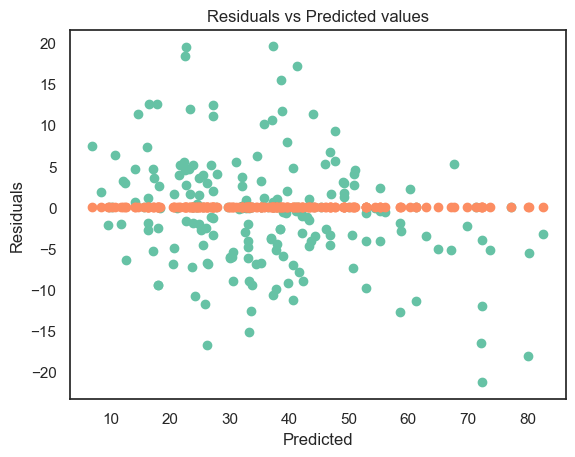

In [37]:
y_pred_val = dt_regressor_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

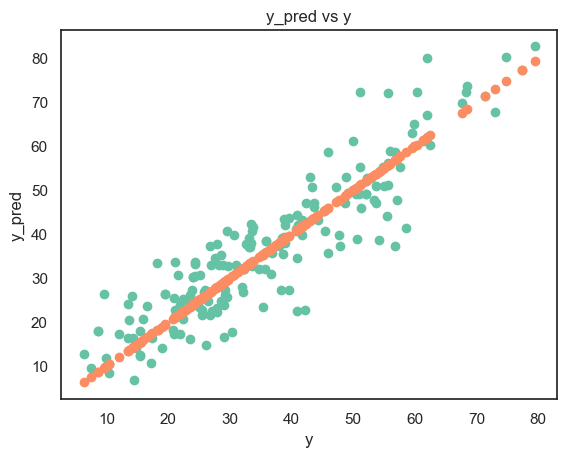

In [38]:
plt.scatter(y_val, y_pred_val)
plt.scatter(y_val, y_val)
plt.title('y_pred vs y')
plt.ylabel('y_pred')
plt.xlabel('y')
plt.show()

In [39]:
dt_regressor_model.feature_importances_

array([0.3648116 , 0.09010867, 0.02952562, 0.12889968, 0.02101396,
       0.01814824, 0.02134285, 0.32614938])

In [40]:
importance = pd.DataFrame({'importance':dt_regressor_model.feature_importances_}, index = X.columns)
importance.sort_values(by="importance", ascending = False).head(10)

,importance
cement,0.364812
age,0.326149
water,0.128900
slag,0.090109
flyash,0.029526
fineaggregate,0.021343
superplasticizer,0.021014
coarseaggregate,0.018148


## 3.5 Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor_model = RandomForestRegressor()
rf_regressor_model.fit(X_train, y_train)
y_pred = rf_regressor_model.predict(X_test)

Validation
R^2: 0.9073
MSE: 21.8643
RMSE: 4.6759


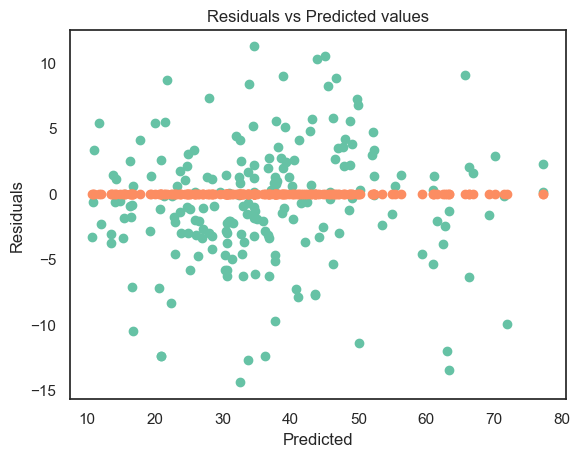

In [42]:
y_pred_val = rf_regressor_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

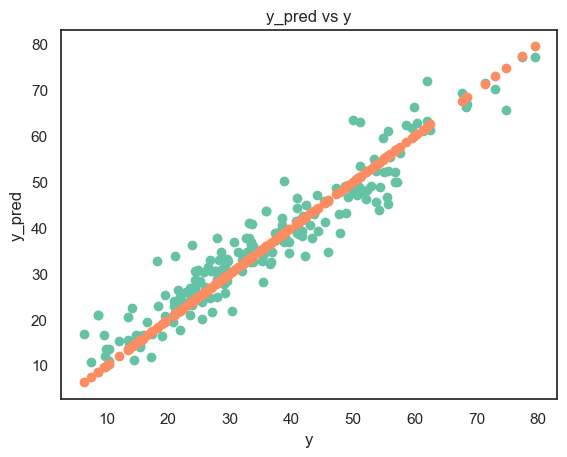

In [43]:
plt.scatter(y_val, y_pred_val)
plt.scatter(y_val, y_val)
plt.title('y_pred vs y')
plt.ylabel('y_pred')
plt.xlabel('y')
plt.show()

In [44]:
importance = pd.DataFrame({'importance':rf_regressor_model.feature_importances_},index = X.columns)
importance.sort_values(by="importance", ascending = False).head(10)

,importance
age,0.331292
cement,0.329762
water,0.131276
slag,0.079009
superplasticizer,0.052532
fineaggregate,0.030450
coarseaggregate,0.028123
flyash,0.017556


In [45]:
rf_regressor = RandomForestRegressor()

rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

rf_cv_model = GridSearchCV(rf_regressor, rf_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; tota

In [46]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [47]:
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 8,
                                min_samples_split = 2,
                                 n_estimators = 300)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=8, n_estimators=300)

Validation
R^2: 0.8871
MSE: 26.6337
RMSE: 5.1608


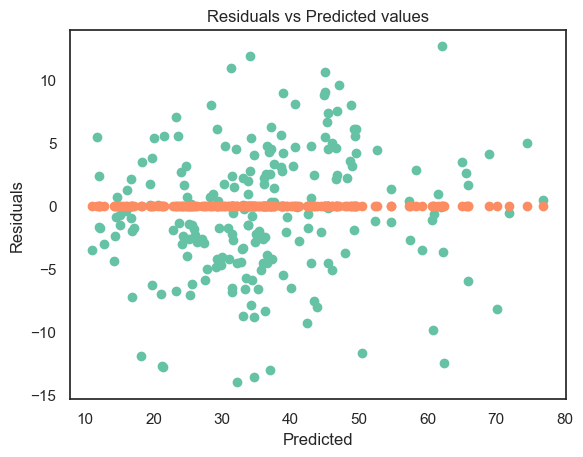

In [48]:
y_pred_val = rf_tuned.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

In [49]:
rf_regressor_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

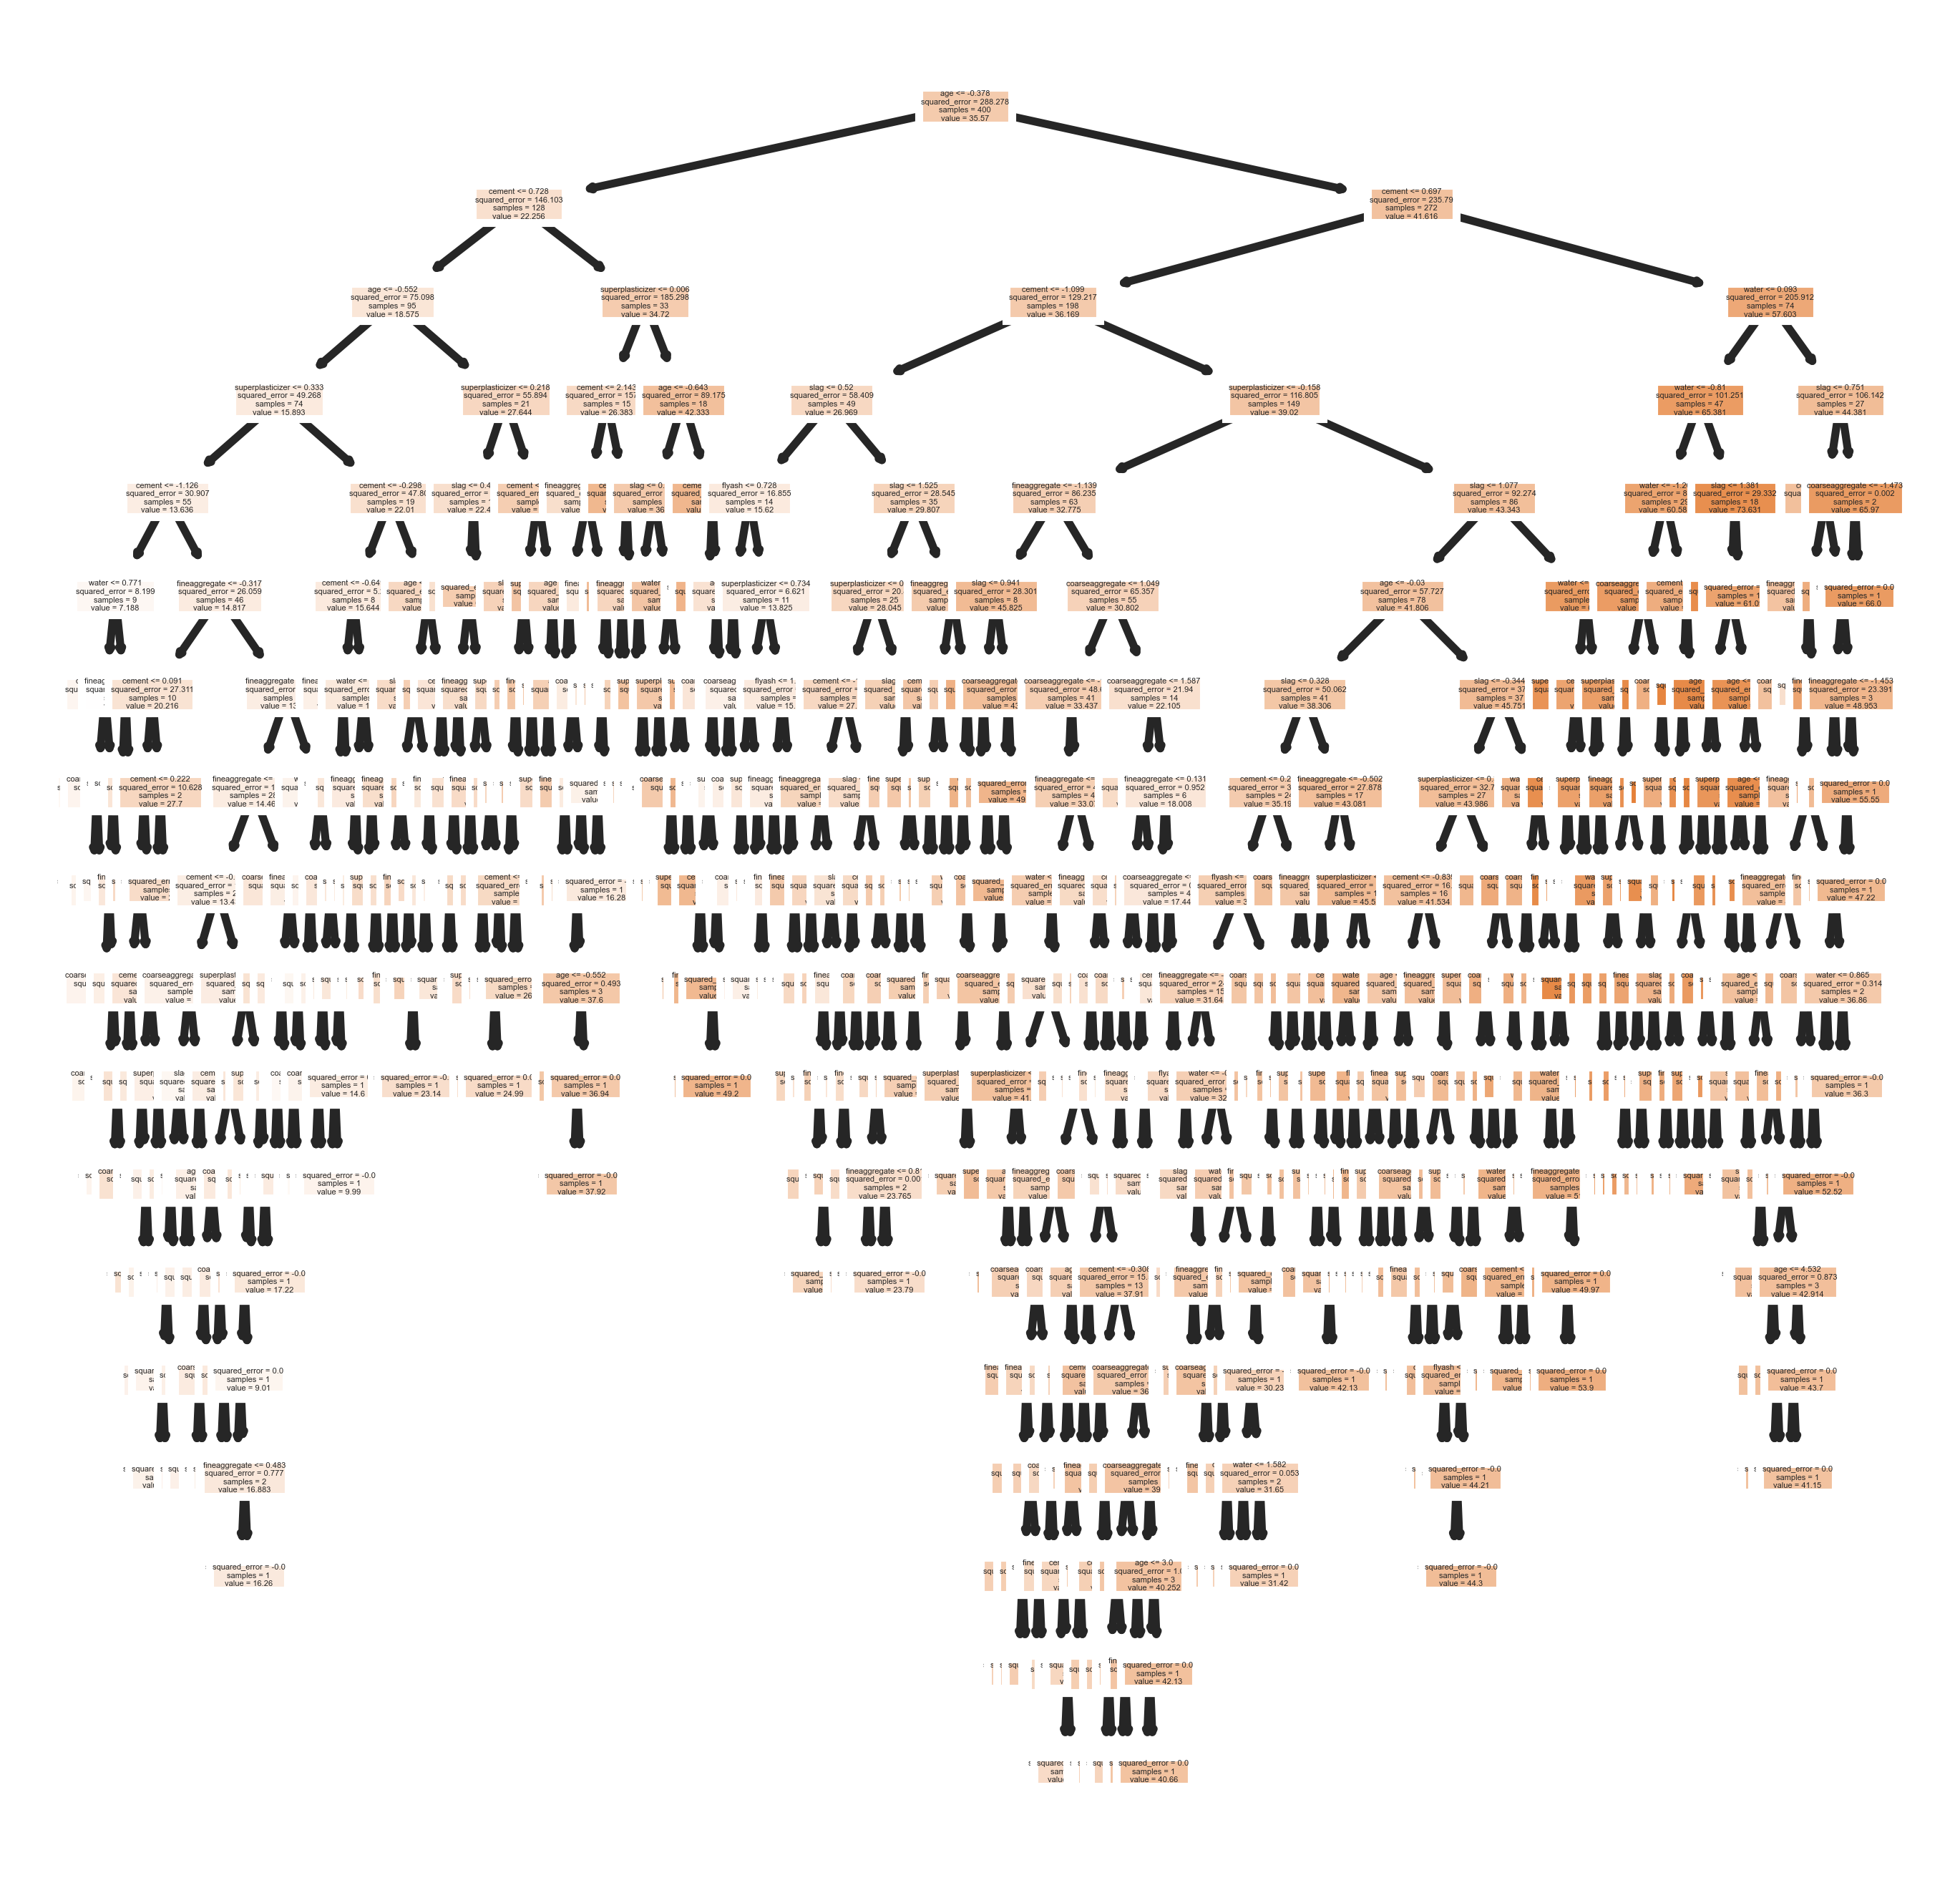

In [50]:
from sklearn import tree

fn=X.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_regressor_model.estimators_[0],
               feature_names = fn,
               filled = True);
fig.savefig('rf_individualtree.png')

## XGBoost Regressor

(se debe instalar)

In [52]:
import xgboost as xgb

xg_regressor_model = xgb.XGBRegressor()
xg_regressor_model.fit(X_train, y_train)
y_pred = rf_regressor_model.predict(X_test)

Validation
R^2: 0.9115
MSE: 20.8784
RMSE: 4.5693


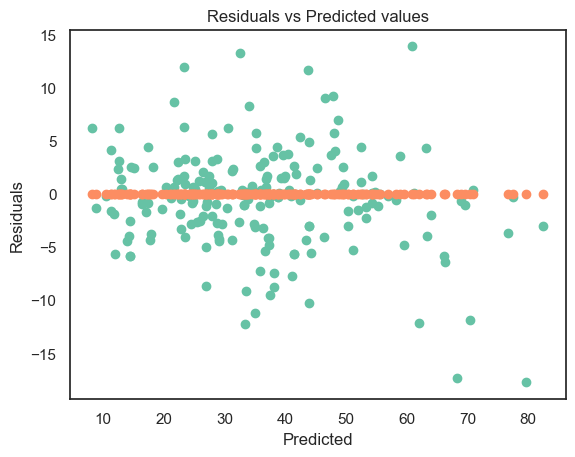

In [53]:
y_pred_val = xg_regressor_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

In [54]:
xgb_regressor = xgb.XGBRegressor()

xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

xgb_cv_model  = GridSearchCV(xgb_regressor,xgb_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning

In [55]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}

In [56]:
xgb_tuned = xgb.XGBRegressor(subsample = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 3, 
                         n_estimators = 300).fit(X_train, y_train)

Validation
R^2: 0.9254
MSE: 17.5945
RMSE: 4.1946


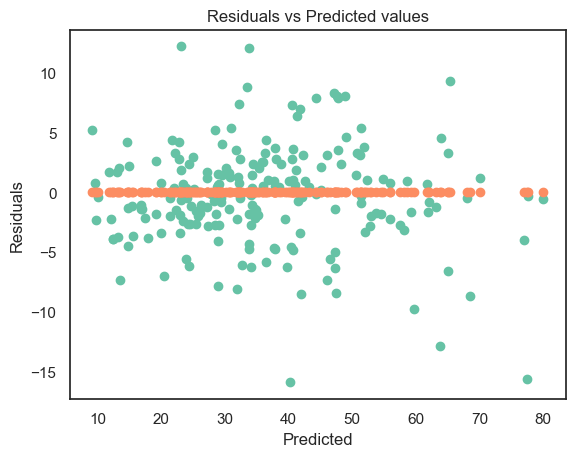

In [57]:
y_pred_val = xgb_tuned.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

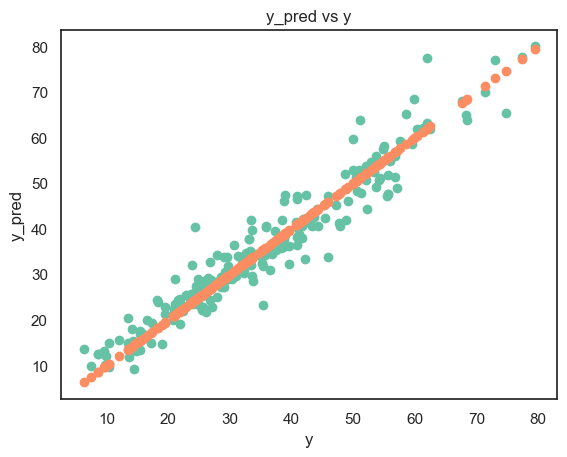

In [58]:
plt.scatter(y_val, y_pred_val)
plt.scatter(y_val, y_val)
plt.title('y_pred vs y')
plt.ylabel('y_pred')
plt.xlabel('y')
plt.show()

# EJERCICIOS PROPUESTOS

## Ejercicio 1.

a. Consulte y consigne una explicación corta del funcionamiento de los Árboles de Decisión (Decision Trees) y Bosques Aleatorios (Random Forest).

b. En el dataset auto-mpg implemente:

- 1. Regresión Ridge.
- 2. Regresión Lasso.
- 3. Decision Tree Regression.
- 4. Random Forest Regression.
- 5. (Opcional) XGBoost 

Para cada una de los modelos de regresión identifique cuáles son los atributos que influyen más en el comportamiento de la variable Target.

c. Encuentre los mejores valores de los hiperparámetros de tal manera que mejore el RMSE obtenido cuando realizaron el Taller 4. Tenga en cuenta que puede entrenar modelos que utilicen un subconjunto del total de atributos.

d. Indique qué conclusiones puede sacar de los procedimientos realizados y los resultados obtenidos.

## Respuestas

## a. 
- Los árboles de decisión son algoritmos estadísticos o técnicas de machine learning que nos permiten la construcción de modelos predictivos de analítica de datos para el Big Data basados en su clasificación según ciertas características o propiedades, o en la regresión mediante la relación entre distintas variables para predecir el valor de otra.

- Un bosque aleatorio es un algoritmo de Machine Learning supervisado. Es uno de los algoritmos más utilizados debido a su precisión, simplicidad y flexibilidad. El hecho de que pueda usarse para tareas de clasificación y regresión, combinado con su naturaleza no lineal, lo hace altamente adaptable a una variedad de datos y situaciones.

Diferencia:

Un bosque aleatorio es un grupo de árboles de decisión. Sin embargo, hay algunas diferencias entre los dos. Un árbol de decisiones tiende a crear reglas que utiliza para tomar decisiones. Un bosque aleatorio elegirá características al azar y hará observaciones, construirá un bosque de árboles de decisión y luego promediará los resultados.



## b.

In [59]:
#Vamos a utilizar el dataset auto-mpg (https://www.kaggle.com/datasets/uciml/autompg-dataset)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('auto-mpg.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?') 

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression (X,y,y_pred):
    
    score = r2_score(y, y_pred)
    print('R^2: %.4f' % score)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print('MSE: %.4f'% mse)
    print('RMSE: %.4f' % rmse)

    e = y - y_pred

    plt.scatter(y_pred,e)
    a = np.zeros(len(e))
    a = a.reshape(-1,1)
    plt.scatter(y_pred,a)
    plt.title('Residuals vs Predicted values')
    plt.ylabel('Residuals')
    plt.xlabel('Predicted')
    plt.show()

In [61]:
df['car name'] = df['car name'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    string 
dtypes: float64(4), int64(4), string(1)
memory usage: 28.1 KB


In [62]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [63]:
df_clean = df.dropna()
df_clean.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [64]:
q_low = df_clean["weight"].quantile(0.25)
q_hi  = df_clean["weight"].quantile(0.75)
iqr = q_hi - q_low

lower = q_low - (1.5*iqr)
high = q_hi + (1.5*iqr)

df_clean = df_clean[(df_clean["weight"] < high) & (df_clean["weight"] > lower)]

q_low = df_clean["displacement"].quantile(0.25)
q_hi  = df_clean["displacement"].quantile(0.75)
iqr = q_hi - q_low

lower = q_low - (1.5*iqr)
high = q_hi + (1.5*iqr)

df_clean = df_clean[(df_clean["displacement"] < high) & (df_clean["displacement"] > lower)]

q_low = df_clean["horsepower"].quantile(0.25)
q_hi  = df_clean["horsepower"].quantile(0.75)
iqr = q_hi - q_low

lower = q_low - (1.5*iqr)
high = q_hi + (1.5*iqr)

df_clean = df_clean[(df_clean["horsepower"] < high) & (df_clean["horsepower"] > lower)]

q_low = df_clean["acceleration"].quantile(0.25)
q_hi  = df_clean["acceleration"].quantile(0.75)
iqr = q_hi - q_low

lower = q_low - (1.5*iqr)
high = q_hi + (1.5*iqr)

df_clean = df_clean[(df_clean["acceleration"] < high) & (df_clean["acceleration"] > lower)]

C:\Users\alexa\AppData\Local\Temp\ipykernel_1724\1015586198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')


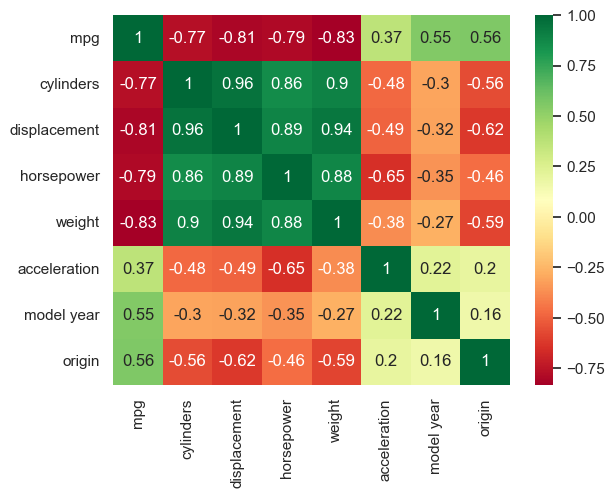

In [65]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

In [66]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='mpg'

y = df_clean[nombre_de_la_variable_de_salida]

#nombre_de_las_variables_de_entrada = []
#df_x = df_clean[nombre_de_las_variables_de_entrada]

X = df_clean.drop([nombre_de_la_variable_de_salida],axis=1)
X = X.drop(['car name'],axis=1)

In [67]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_validacion    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_validacion = particion_para_entrenamiento+particion_para_validacion #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_validacion #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
X_rest, X_test, y_rest, y_test = train_test_split(X,                                         #100% de los datos de entrada. 
                                                  y,                                         #100% de los datos de salida. 
                                                  test_size=particion_para_pruebas, 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
X_train, X_val, y_train, y_val = train_test_split(X_rest,                                    #Una fracción de los datos de entrada. 
                                                  y_rest,                                    #Una fracción de los datos de salida.        
                                                  test_size=particion_para_validacion/particion_para_entrenamiento_y_validacion, #cuidado! este es el porcentaje respecto al "resto". 
                                                  random_state=valor_semilla_aleatoria, 
                                                  shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

## b.1). Regresión Ridge

In [68]:
ridge = Ridge()

alphas = np.arange(0.1, 100, 0.1)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(X_train, y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

In [69]:
clf.best_params_

{'alpha': 26.400000000000002}

In [70]:
alpha = 26.400000000000002
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

Validation
R^2: 0.7939
MSE: 13.1969
RMSE: 3.6328


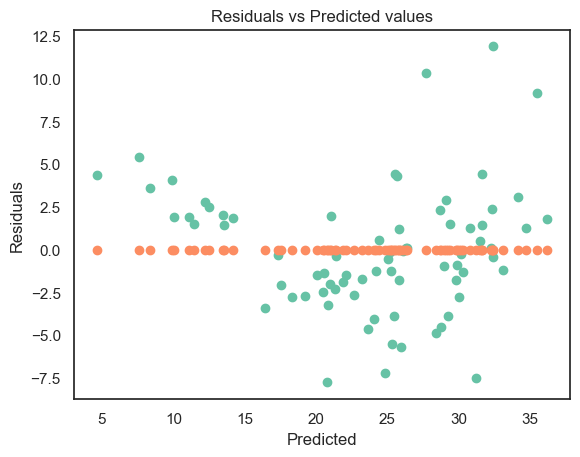

In [71]:
y_pred_val = ridge_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## b.2) Regresión Lasso

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso()

alphas = np.arange(0.001, 10, 0.001)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(X_train, y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

In [73]:
clf.best_params_

{'alpha': 0.124}

In [74]:
alpha = 0.124
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

Validation
R^2: 0.7970
MSE: 13.0024
RMSE: 3.6059


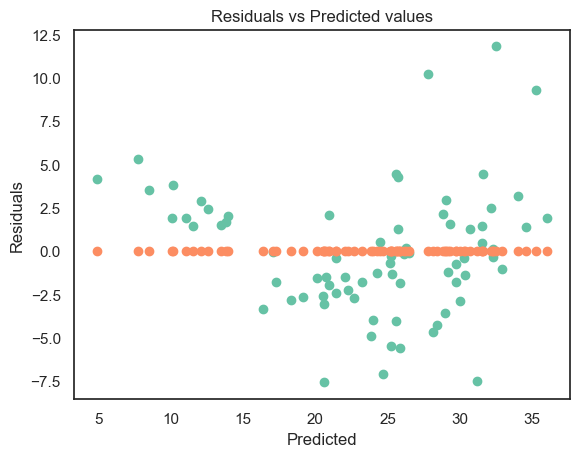

In [75]:
y_pred_val = lasso_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## b.3.) Decision Tree Regresión


In [76]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

dt_regressor_model = DecisionTreeRegressor()
dt_regressor_model.fit(X_train, y_train)
y_pred = dt_regressor_model.predict(X_test)

Validation
R^2: 0.7213
MSE: 17.8499
RMSE: 4.2249


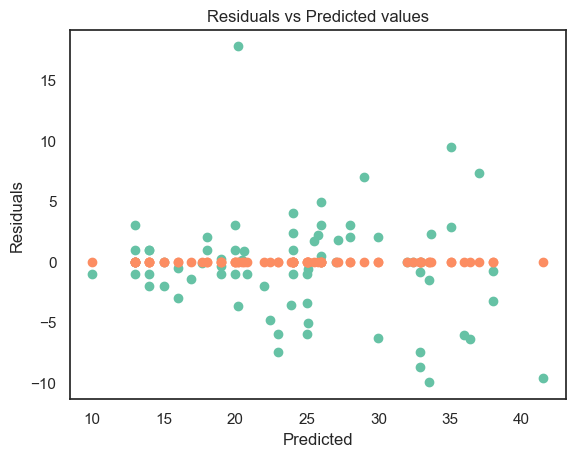

In [77]:
y_pred_val = dt_regressor_model.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## b.4) Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

rf_cv_model = GridSearchCV(rf_regressor, rf_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; tota

In [79]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 300}

In [80]:
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 4,
                                min_samples_split = 6,
                                 n_estimators = 100)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=4, min_samples_split=6)

Validation
R^2: 0.8460
MSE: 9.8655
RMSE: 3.1409


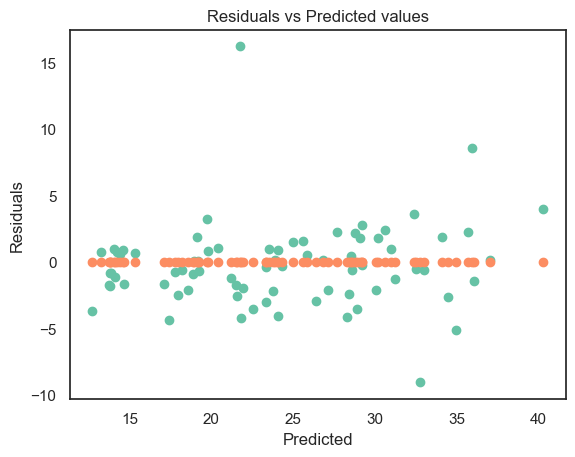

In [81]:
y_pred_val = rf_tuned.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## b.5) XGBoost

In [82]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

xgb_cv_model  = GridSearchCV(xgb_regressor,xgb_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END learning

In [83]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}

In [84]:
xgb_tuned = xgb.XGBRegressor(subsample = 0.8, 
                         learning_rate = 0.1, 
                         max_depth = 5, 
                         n_estimators = 50).fit(X_train, y_train)

Validation
R^2: 0.8653
MSE: 8.6237
RMSE: 2.9366


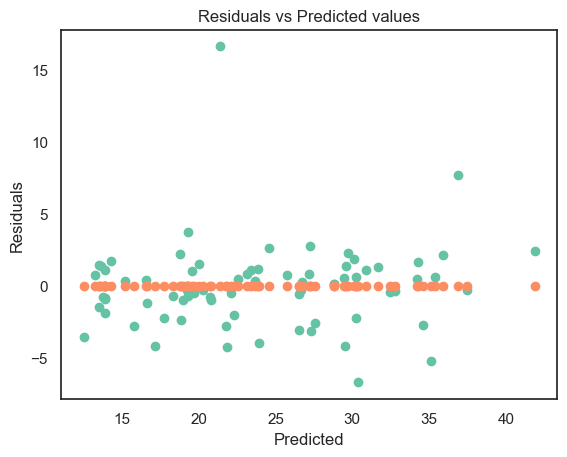

In [85]:
y_pred_val = xgb_tuned.predict(X_val)
print('Validation')
eval_regression(X_val,y_val,y_pred_val)

## c.

Al utilizar los mejores valores de los hiperparámetros, se encontró que en todos los metodos retornaron un resultado mucho mejor que los resultados obtenidos en el Taller 4. Anteriormente, los resultados fueron los siguientes:



![knn](ResultadosTaller4.png)

Acorde a estos nuevos resultados, podemos ver que tanto el MSE como el RMSE ahora son mas efectivos. 

## d.

De los resultados obtenidos, podemos concluir que el mejor modelo para este dataset es el XGBoost, ya que es el que tiene el menor RMSE y MSE. También podemos concluir que los atributos que influyen mas en el comportamiento de la variable Target son: 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'. Además, al comparar los resultados de los modelos con los resultados obtenidos en el Taller 4, podemos concluir que los modelos que se utilizaron en este taller son mucho mas efectivos que los modelos utilizados en este taller debido a que la regresión multiple tiene en cuenta todos los atributos que se requieren ya que al ser múltiple ajusta mejor la predicción a todos los hiperparámetros usados, mientras que el model de regresión simple solo tiene en cuenta algunos atributos.

# **Metodología**

1. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 09 de noviembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_8_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 09 de noviembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 8 se asignará así:

- Ejercicios Taller 8 (100%)